In [48]:
class Node():
    def __init__(self, entry):
        # EOS account name.
        self.identity = entry['identity']
        # Network Stake.
        self.stake = entry['stake']
        # Last emit.
        self.last_emit = entry['last_emit']
        # IP address.
        self.address = entry['address']
        # Port number.
        self.port = entry['port']
        # List of tuples (edge name, edge weight)
        self.edges = entry['edges']
        
    def __repr__(self):
        return self.__str__()

    def __str__(self):
        edge_str = []
        for el in self.edges :
            edge_str.append((el[0], el[1]))
        edge_str = str(edge_str)
        return  "( " + str(self.identity) + " | " + str(self.stake) + " | " + str(self.last_emit)  + ' | ' + edge_str + " )"


In [52]:

import random, string

ids = [''.join(random.choice(string.ascii_lowercase) for x in range(5)) for _ in range(5)]
edges = []

for id_i in ids:
    edges_i = []
    weight_sum = random.randint(1, 100)
    edges_i.append((id_i, weight_sum))
    for _ in range(random.randint(0, 5)):
        other_id = random.choice(ids)
        if other_id != id_i:
            weight = random.randint(1, 100)
            weight_sum += weight
            edges_i.append( (other_id, weight) )
        
            
        edges_normalized = []
        for edge_tuple in edges_i:
            edges_normalized.append( (edge_tuple[0], edge_tuple[1]/weight_sum) )
        edges.append(edges_normalized)
    

b_nodes = []
for i in range(len(ids)):    
    
    port = random.randint(0, 10000) + 5000
    n = Node( {'identity': ids[i], 
               'stake': random.randint(0, 100), 
               'last_emit': random.randint(0, 100),
               'address': 'localhost:' + str(port),
               'port': port,
               'edges': edges[i]
              })
    print(n)
    b_nodes.append(n)
    


( pftsz | 99 | 31 | [('pftsz', 0.8571428571428571), ('mmhzd', 0.14285714285714285)] )
( mmhzd | 53 | 16 | [('pftsz', 0.5070422535211268), ('mmhzd', 0.08450704225352113), ('ynsvh', 0.4084507042253521)] )
( uvndm | 6 | 13 | [('pftsz', 0.3582089552238806), ('mmhzd', 0.05970149253731343), ('ynsvh', 0.2885572139303483), ('uvndm', 0.2935323383084577)] )
( ynsvh | 14 | 56 | [('mmhzd', 0.36666666666666664), ('vptli', 0.6333333333333333)] )
( vptli | 40 | 94 | [('uvndm', 0.35766423357664234), ('pftsz', 0.6423357664233577)] )


{'pftsz': array([1.00000000e+00, 2.38418583e-08]), 'mmhzd': array([0.30901696, 0.95105658]), 'uvndm': array([-0.80901709,  0.58778522]), 'ynsvh': array([-0.80901698, -0.58778535]), 'vptli': array([ 0.30901711, -0.95105647])}


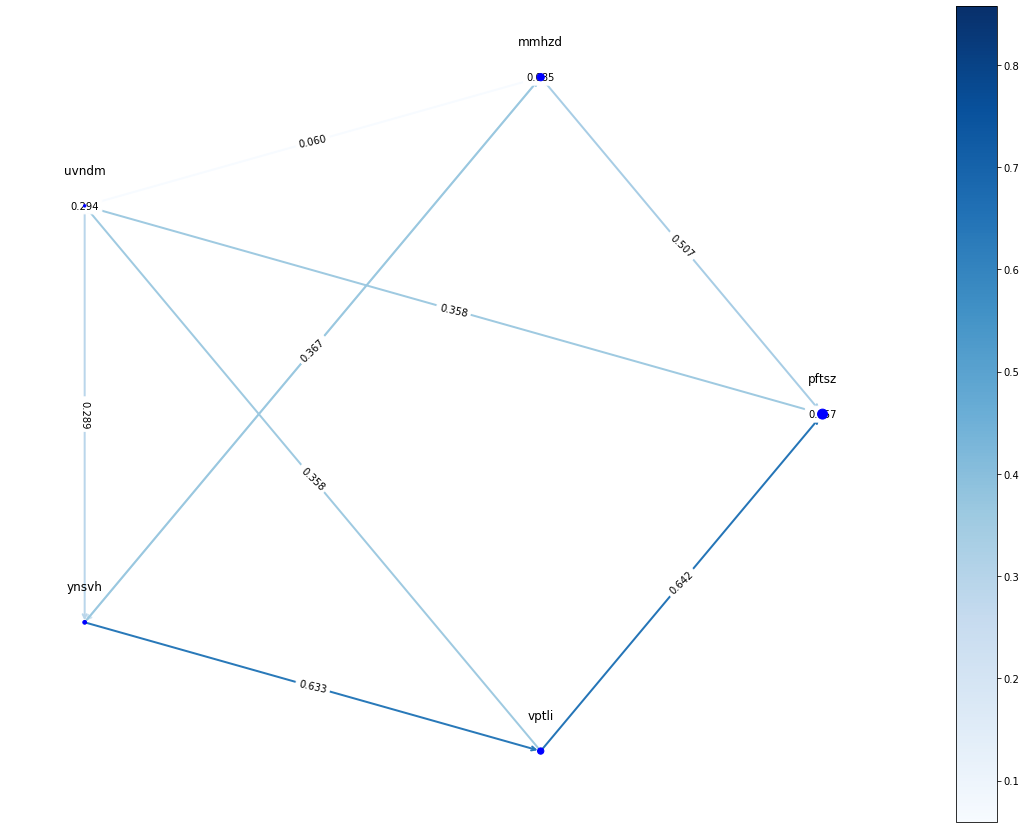

In [133]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

node_sizes = []
node_labels = {}
for node in b_nodes:
    G.add_node(node.identity)
    node_sizes.append(node.stake)
    node_labels[node.identity] = str(node.identity)

edge_colors = []
edge_alphas = []
edge_labels = {}
for node in b_nodes:
    for edge in node.edges:
        G.add_edge(node.identity, edge[0])
        edge_colors.append(edge[1])
        edge_alphas.append(edge[1])
        edge_labels[(node.identity, edge[0])] = "%.3f" % edge[1]
        
#print (edge_labels)
#print (G.edges())

plt.figure(figsize=(20,15)) 

pos = nx.layout.circular_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)


edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, with_labels = True)

import numpy
print (pos)

for node in b_nodes:
    pos[node.identity] = pos[node.identity] + numpy.array([0, 0.1])
labels = nx.draw_networkx_labels(G, pos, node_labels)


# set alpha value for each edge
for i in range(len(b_nodes)):
    edges[i].set_alpha(edge_alphas[i])

    
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()


In [95]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(G,'graph.dot')